<font size=6 face='黑体'>1.USA.gov

In [1]:
import json
path='example.txt'
records = [json.loads(line) for line in open(path)]
records[0]
records[0]['tz']

'America/New_York'

In [2]:
records[0]
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]
def count_list(seqs):
    counts = {}
    for x in seqs:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts
counts = count_list(time_zones)
def top_list(counts,n):
    counts_sorted = [(counts1,zones) for zones,counts1 in counts.items()]
    counts_sorted.sort()    #sort 会改变原数列
    return counts_sorted[-n:]
top_list(counts,10)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [3]:
from collections import Counter
counts2 = Counter(time_zones)
counts2.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [4]:
import pandas as pd
#from pandas import Dataframe,Series
import numpy as np
frame = pd.DataFrame(records)
frame['tz'][0:10]
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

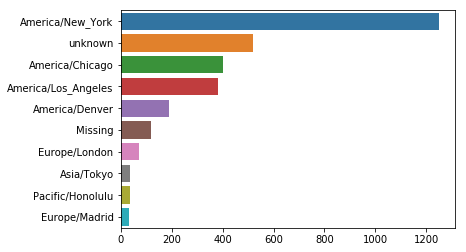

In [6]:
import seaborn as sns
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'unknown'
tz_counts = clean_tz.value_counts()
subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [7]:
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])
a_counts = result.value_counts()
a_counts[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

<font color=red size=4 face='黑体'>根据a的信息对tz统计信息进行分解

In [8]:
import pandas as pd
import numpy as np
data = pd.DataFrame({'num':['one','one','one','two','two','two','two'],'size':['big','small','small','big','small','small','big'],
                    'color':['red','red','blue','blue','red','red','red']})
new_data = data.groupby(['num','size'])
new_data.size()

num  size 
one  big      1
     small    2
two  big      2
     small    2
dtype: int64

H:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                     Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
Unknown                    245.0    276.0
America/New_York           339.0    912.0


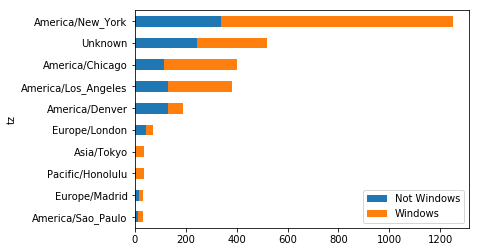

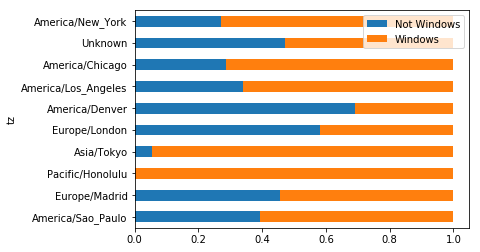

In [9]:
#首先把a为缺失值的样本（实例）删去
new_frame = frame[frame.a.notnull()]
new_frame.loc[new_frame.tz.isnull(),'tz'] = 'Missing'
new_frame.loc[new_frame['tz']=='','tz'] = 'Unknown'
#print(new_frame)
operating_system = np.where(new_frame['a'].str.contains('Windows'),'Windows','Not Windows')
#print(operating_system[:10])
tz_os = new_frame.groupby(['tz',operating_system])
conbine_count = tz_os.size().unstack().fillna(0) #.size的功能与value_counts（）类似，考虑两个特征
#print(conbine_count[75:76])
indexer = conbine_count.sum(1).argsort()#sum(1)表示按行相加；argsort表示按大小对索引进行排序
#print(indexer[:10])
count_subset = conbine_count.take(indexer[-10:])#take(indexer)[-10:] 表示最大的10个数的索引值
print(count_subset)
count_subset.plot(kind='barh',stacked=True)
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)

In [10]:
conbine_count.sum(1).nlargest(10)

tz
America/New_York       1251.0
Unknown                 521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

                     tz      level_1  total
0     America/Sao_Paulo  Not Windows   13.0
1     America/Sao_Paulo      Windows   20.0
2         Europe/Madrid  Not Windows   16.0
3         Europe/Madrid      Windows   19.0
4      Pacific/Honolulu  Not Windows    0.0
5      Pacific/Honolulu      Windows   36.0
6            Asia/Tokyo  Not Windows    2.0
7            Asia/Tokyo      Windows   35.0
8         Europe/London  Not Windows   43.0
9         Europe/London      Windows   31.0
10       America/Denver  Not Windows  132.0
11       America/Denver      Windows   59.0
12  America/Los_Angeles  Not Windows  130.0
13  America/Los_Angeles      Windows  252.0
14      America/Chicago  Not Windows  115.0
15      America/Chicago      Windows  285.0
16              Unknown  Not Windows  245.0
17              Unknown      Windows  276.0
18     America/New_York  Not Windows  339.0
19     America/New_York      Windows  912.0


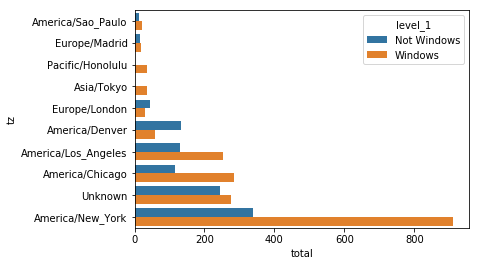

In [11]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
print(count_subset)
sns.barplot(x='total',y='tz',hue='level_1',data=count_subset)

H:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
H:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
H:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

                     tz     level_1   percent
0     America/Sao_Paulo  percent_NW  0.393939
1     America/Sao_Paulo   percent_W  0.606061
2         Europe/Madrid  percent_NW  0.457143
3         Europe/Madrid   percent_W  0.542857
4      Pacific/Honolulu  percent_NW  0.000000
5      Pacific/Honolulu   percent_W  1.000000
6            Asia/Tokyo  percent_NW  0.054054
7            Asia/Tokyo   percent_W  0.945946
8         Europe/London  percent_NW  0.581081
9         Europe/London   percent_W  0.418919
10       America/Denver  percent_NW  0.691099
11       America/Denver   percent_W  0.308901
12  America/Los_Angeles  percent_NW  0.340314
13  America/Los_Angeles   percent_W  0.659686
14      America/Chicago  percent_NW  0.287500
15      America/Chicago   percent_W  0.712500
16              Unknown  percent_NW  0.470250
17              Unknown   percent_W  0.529750
18     America/New_York  percent_NW  0.270983
19     America/New_York   percent_W  0.729017


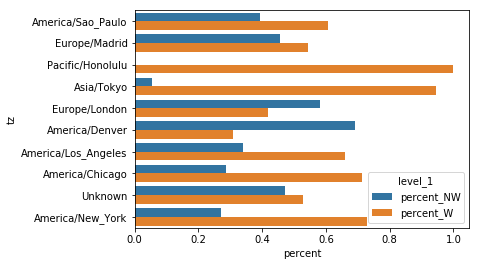

In [12]:
#def norm_total(group):
 #   group['normed_total'] = group.total / group.total.sum()
  #  #print(group)
   # return group
#result = count_subset.groupby('tz').apply(norm_total)
#print(result)
#count_subset['total'] = count_subset['total']/count_subset['total'].groupby(count_subset['tz']).sum()
#count_subset['total']
#count_group = count_subset['total'].groupby(count_subset['tz']).sum()
#count_group
count_subset1 = conbine_count.take(indexer[-10:])
count_subset1['sum'] = count_subset1['Not Windows'] + count_subset1['Windows']
count_subset1['percent_NW'] = count_subset1['Not Windows']/count_subset1['sum']
count_subset1['percent_W'] = count_subset1['Windows']/count_subset1['sum']
count_subset2 = count_subset1[['percent_NW','percent_W']]

count_subset2 = count_subset2.stack()
count_subset2.name = 'percent'
count_subset2 = count_subset2.reset_index()
print(count_subset2)
sns.barplot(x='percent',y='tz',hue='level_1',data=count_subset2)

In [13]:
data = pd.DataFrame([[1,2],[4,5],[7,1]])
data.div([5,2,2],axis=0)

,0,1
0,0.2,0.4
1,2.0,2.5
2,3.5,0.5


<font size=6 face='黑体'>2.MovieLens 1M

In [14]:
col_name1 = ['user_id','gender','age','occupation','zip']
pd.options.display.max_rows = 10
users = pd.read_table(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\datasets\movielens\users.dat',sep='::',header=None,names=col_name1)

col_name2 = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\datasets\movielens\ratings.dat',sep='::',header=None,names=col_name2)

col_name3 = ['movie_id','title','genres']
movies = pd.read_table(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\datasets\movielens\movies.dat',sep='::',header=None,names=col_name3)

print(users)
print('===============================')
print(ratings)
print('===============================')
print(movies)

H:\anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
H:\anaconda\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


      user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
3           4      M   45           7  02460
4           5      M   25          20  55455
...       ...    ...  ...         ...    ...
6035     6036      F   25          15  32603
6036     6037      F   45           1  76006
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]
         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040     

H:\anaconda\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


<font color=red size=4 face='黑体'>把三张数据框融合在一起

In [16]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [17]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

<font color=red size=4 face='黑体'>按照性别计算每部电影的平均得分(pivot_table方法)

In [18]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995),NaN,3.500000


<font color=red size=4 face='黑体'>对title进行分组，用.size()得到分组大小，选取评分数据大于250的电影

In [20]:
rank_by_title = data.groupby('title').size()
print(rank_by_title)
print('===========================================')
active_titles = rank_by_title[rank_by_title>=250]
print(active_titles)
print('===========================================')
print(active_titles.index)

title
$1,000,000 Duck (1971)                       37
'Night Mother (1986)                         70
'Til There Was You (1997)                    52
'burbs, The (1989)                          303
...And Justice for All (1979)               199
                                           ... 
Zed & Two Noughts, A (1985)                  29
Zero Effect (1998)                          301
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995)      2
Zeus and Roxanne (1997)                      23
eXistenZ (1999)                             410
Length: 3706, dtype: int64
title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)        

<font color=red size=4 face='黑体'>根据索引值在mean_ratings中选取对应的行

In [21]:
active_mean_ratings = mean_ratings.loc[active_titles.index]
active_mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


<font color=red size=4 face='黑体'>为了解女性观众最喜欢的电影，对F列降序排列

In [22]:
top_female_ratings = active_mean_ratings.sort_values(by='F',ascending=False)   #ascending=False 表示降序排列
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


<font color=red size=4 face='黑体'>计算评分分歧
<font color=red size=4 face='黑体'>1、计算平均得分之差，并进行排序（找出男女之间分歧最大的电影

In [23]:
active_mean_ratings['diff'] = abs(active_mean_ratings['F']-active_mean_ratings['M'])
sorted_by_diff = active_mean_ratings.sort_values(by='diff',ascending=False)
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
...,...,...,...
Robin Hood: Prince of Thieves (1991),3.161290,3.163347,0.002056
Trainspotting (1996),3.958974,3.960432,0.001457
Jerry Maguire (1996),3.758315,3.759424,0.001109


<font color=red size=4 face='黑体'>2、计算方差或标准差（不考虑性别因素）

In [24]:
rank_std_by_title = data.groupby('title')['rating'].std()
rank_std_by_title = rank_std_by_title.loc[active_titles.index]
rank_std_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: rating, Length: 1216, dtype: float64

<font size=6 face='黑体'>3.全美婴儿姓名

In [25]:
import pandas as pd

names1880 = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\datasets\babynames\yob1880.txt',names=['name','sex','births'])
count_by_sex = names1880.groupby('sex').births.sum()
count_by_sex

sex
F     90993
M    110493
Name: births, dtype: int64

<font color=red size=4 face='黑体'>将各个年份的数据组装到一个DataFrame中（pandas.concat）

In [26]:
years = range(1880,2011)
conbine = []

for year in years:
    path = r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\datasets\babynames\yob%d.txt' % year
    frame = pd.read_csv(path,names=['name','sex','births'])
    frame['year'] = year
    conbine.append(frame)
    
names = pd.concat(conbine,ignore_index=True)

<font color=red size=4 face='黑体'>按照性别将不同年份的出生人数聚合

pandas.core.frame.DataFrame

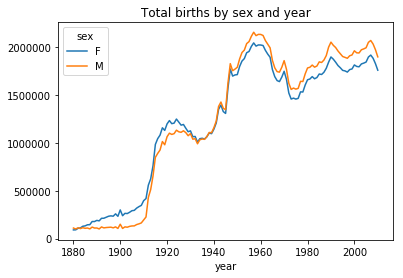

In [27]:
import matplotlib.pyplot as plt
names_list = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

#x = names_list.index
#y1 = names_list['F']
#y2 = names_list['M']
#plt.plot(x,y1,'r-',label='F')
#plt.plot(x,y2,'g-',label='M')
#plt.legend(loc=2)
#plt.grid(True)
#plt.show()
names_list.plot(title='Total births by sex and year')
type(names_list)

In [28]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

<font color=red size=4 face='黑体'>取每对sex/year组合的前1000个名字

In [29]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
#print(grouped)
top1000 = grouped.apply(get_top1000)
print(top1000.head())
top1000.reset_index(inplace=True,drop=True)
top1000

                 name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [30]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top = pd.concat(pieces,ignore_index=True)
top

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


<font color=red size=4 face='黑体'>分析命名趋势

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245408D7240>,
      dtype=object)

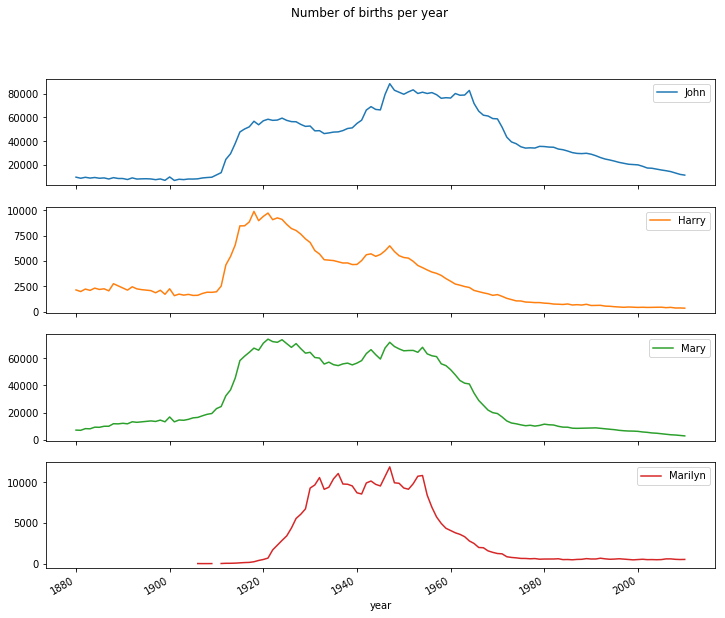

In [31]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

<font color=red size=4 face='黑体'>评估命名多样性的增长

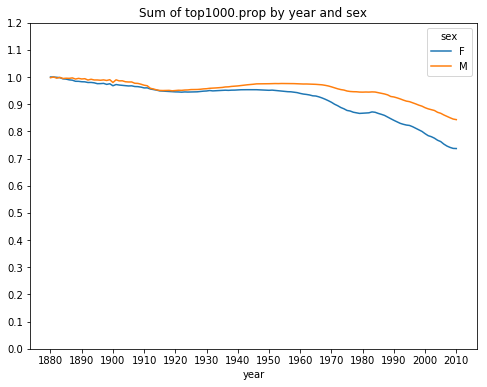

In [32]:
import numpy as np
prop_births = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum) #计算最流行的1000个名字所占的比例
prop_births.plot(figsize=(8,6),title='Sum of top1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

<font color=red size=4 face='黑体'>计算占总出生人数前50%的不同名字的数量(cumsum()：累加)

In [33]:
df1 = boys[boys.year==1880]
in1880 = df1.prop.cumsum()
in1880[:10]
in1880.values.searchsorted(0.5)+1

14

In [34]:
df2 = boys[boys.year==2010]
in2010 = df2.prop.cumsum()
in2010.values.searchsorted(0.5)+1

117

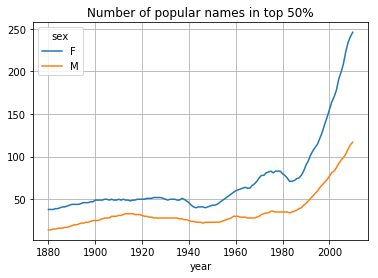

In [35]:
def count_tophalf(group):
    cumsum_list = group.prop.cumsum()
    return cumsum_list.values.searchsorted(0.5)+1
prop_cumsum = top1000.groupby(['year','sex']).apply(count_tophalf)
prop_cumsum = prop_cumsum.unstack('sex')
prop_cumsum.tail()
prop_cumsum.plot(grid=True,title='Number of popular names in top 50%')

<font color=red size=4 face='黑体'>最后一个字母的变革

In [36]:
last_letters = list(map(lambda x:x[-1],names.name))
last_letters
names['last_letter'] = last_letters
names
last_letter_count = names.pivot_table('births',index='last_letter',columns=['sex','year'],aggfunc='sum')
subtable = last_letter_count.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

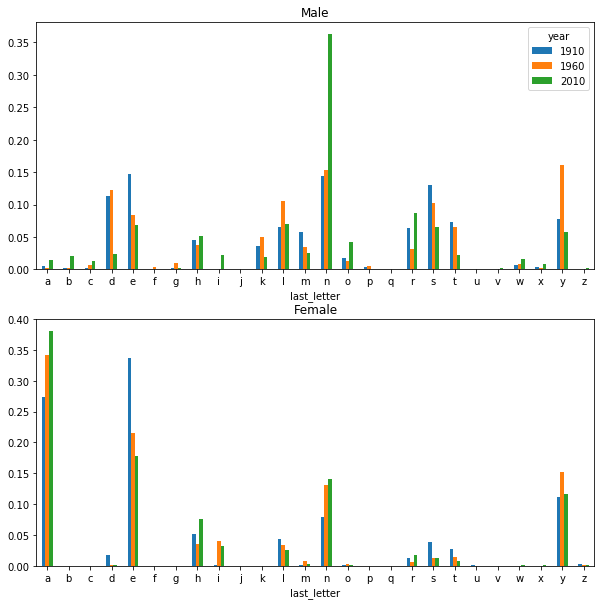

In [37]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,1,figsize=(10,10))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

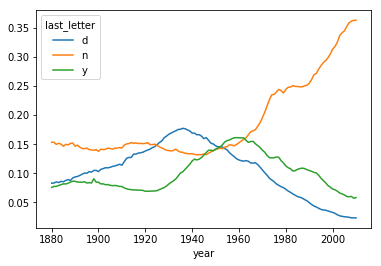

In [38]:
letter_prop_total = last_letter_count / last_letter_count.sum()
dny_ts = letter_prop_total.loc[['d','n','y'],'M'].T
dny_ts.head()
dny_ts.plot()

<font color=red size=4 face='黑体'>变成女孩名字的男孩名字（以及相反情况）

In [39]:
all_names = pd.Series(top1000.name.unique())
lesl_like = all_names[all_names.str.lower().str.contains('lesl')]
lesl_like
filtered = top1000[top1000.name.isin(lesl_like)]
#filtered.groupby('name').births.sum()
lesl_like_total = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
lesl_like_total = lesl_like_total.div(lesl_like_total.sum(1),axis=0)
lesl_like_total

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


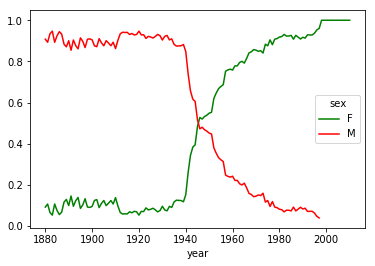

In [41]:
lesl_like_total.plot(style={'M':'r-','F':'g-'})